Found 226 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


C:\Users\MANJU\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6425 - loss: 0.8927
Epoch 1: val_accuracy improved from -inf to 0.77083, saving model to models/mobilenetv2_best_model.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 370ms/step - accuracy: 0.6432 - loss: 0.8926 - val_accuracy: 0.7708 - val_loss: 0.5211 - learning_rate: 0.0010
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7258 - loss: 0.6902
Epoch 2: val_accuracy did not improve from 0.77083
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 284ms/step - accuracy: 0.7266 - loss: 0.6877 - val_accuracy: 0.7708 - val_loss: 0.4957 - learning_rate: 0.0010
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7937 - loss: 0.4484
Epoch 3: val_accuracy did not improve from 0.77083
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.7941 - loss: 0.4477 - val_accuracy: 0.7708 - val_loss: 0.4674 - learning_rate: 0.0010
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8715 - loss: 0.3099
Epoch 4: val_accuracy improved from 0.77083 to 0.79167, saving model to models/mobilenetv2_best_model.h5


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.8714 - loss: 0.3115 - val_accuracy: 0.7917 - val_loss: 0.4058 - learning_rate: 0.0010
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.8405 - loss: 0.4498
Epoch 5: val_accuracy did not improve from 0.79167
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 290ms/step - accuracy: 0.8402 - loss: 0.4491 - val_accuracy: 0.7917 - val_loss: 0.5442 - learning_rate: 0.0010
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - accuracy: 0.8558 - loss: 0.3689
Epoch 6: val_accuracy did not improve from 0.79167
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.8551 - loss: 0.3704 - val_accuracy: 0.7708 - val_loss: 0.4936 - learning_rate: 0.0010
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.8892 - loss: 0.2963
Epoch 7: val_accuracy did not improve from 0.79167

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.8895 - loss: 0.2956 - val_accura

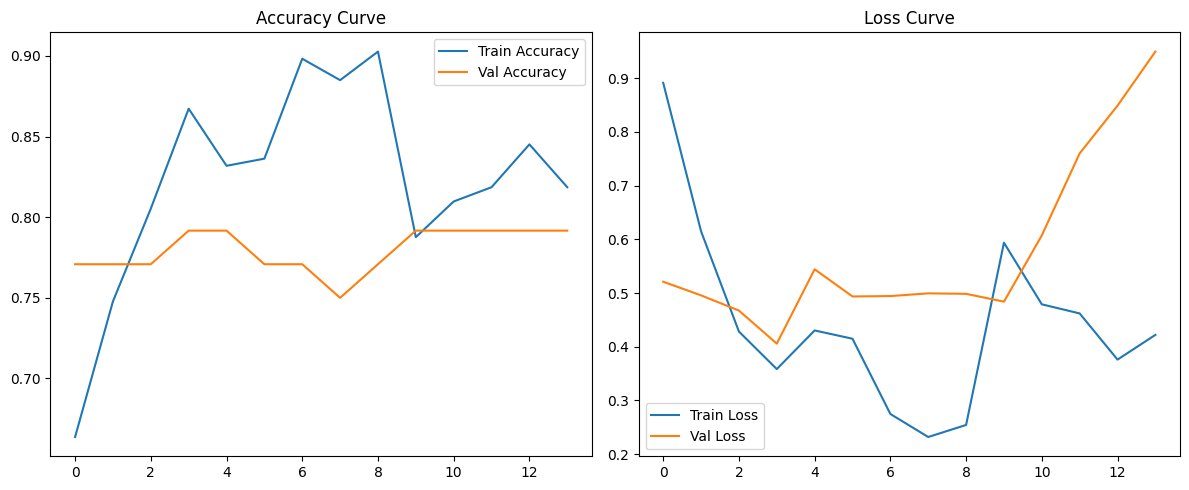

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9785 - loss: 0.1390

🔥 Final Test Accuracy: 96.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 428ms/step

Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.95      1.00      0.97        38
    Diabetic       1.00      0.83      0.91        12

    accuracy                           0.96        50
   macro avg       0.97      0.92      0.94        50
weighted avg       0.96      0.96      0.96        50



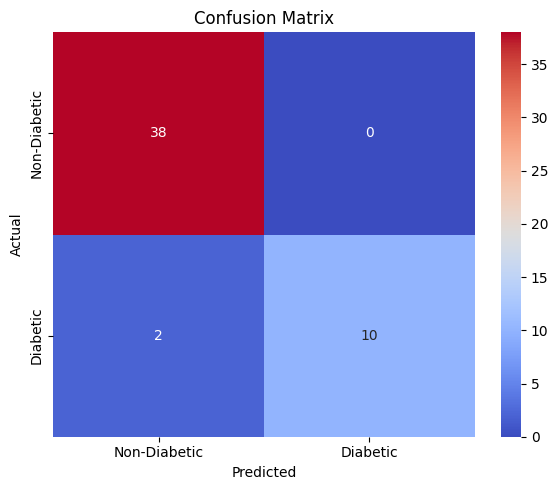

In [1]:
# 🚀 train_ultimate_mobilenetv2.py

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

# -------------------- Parameters --------------------
IMG_SIZE = (224, 224)
BATCH_SIZE = 8
EPOCHS_PHASE1 = 50
EPOCHS_PHASE2 = 5
INIT_LR = 0.001

# -------------------- Directory Setup --------------------
TRAIN_DIR = r'C:\Users\MANJU\Desktop\FYP_MoreData\split_data\train'
VAL_DIR = r'C:\Users\MANJU\Desktop\FYP_MoreData\split_data\val'
TEST_DIR = r'C:\Users\MANJU\Desktop\FYP_MoreData\split_data\test'

# -------------------- Data Augmentation --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# -------------------- Build Model --------------------
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=INIT_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# -------------------- Callbacks --------------------
checkpoint = ModelCheckpoint('models/mobilenetv2_best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)

# -------------------- Phase 1: Transfer Learning --------------------
history1 = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS_PHASE1,
                     callbacks=[checkpoint, earlystop, reduce_lr])

# -------------------- Phase 2: Fine Tuning --------------------
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_gen, validation_data=val_gen, epochs=EPOCHS_PHASE2,
                     callbacks=[checkpoint, earlystop, reduce_lr])

# -------------------- Plot Training Curves --------------------
acc = history1.history['accuracy'] + history2.history['accuracy']
val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
loss = history1.history['loss'] + history2.history['loss']
val_loss = history1.history['val_loss'] + history2.history['val_loss']

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.title("Accuracy Curve")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.title("Loss Curve")
plt.legend()
plt.tight_layout()
plt.savefig("training_curves.png")
plt.show()

# -------------------- Evaluation --------------------
loss, acc = model.evaluate(test_gen)
print(f"\n🔥 Final Test Accuracy: {acc*100:.2f}%")

y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_gen.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Non-Diabetic', 'Diabetic']))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()
